Import the dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/siddhardhan/ml projects/wine quality prediction/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


EDA

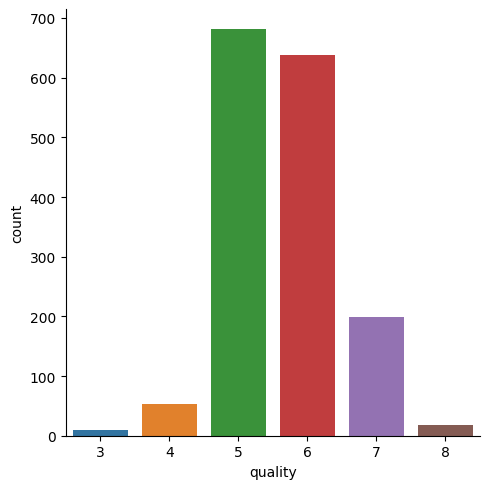

In [ ]:
# number of values for each quality
sns.catplot(x='quality',data=df,kind='count')


<Axes: xlabel='quality', ylabel='volatile acidity'>

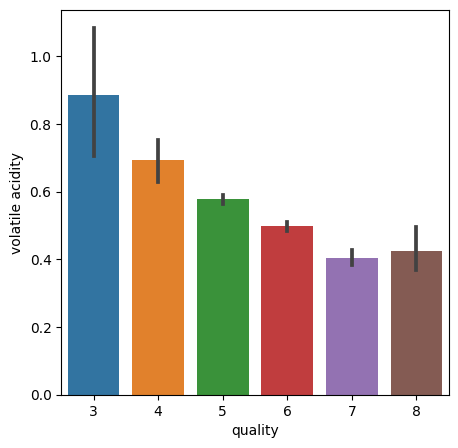

In [ ]:
# volatile acidity vs Quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=df)

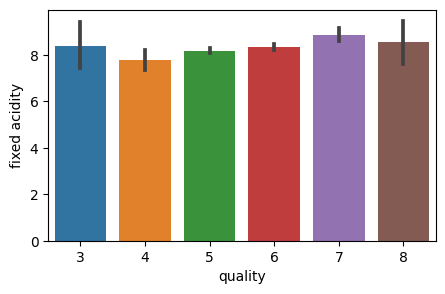

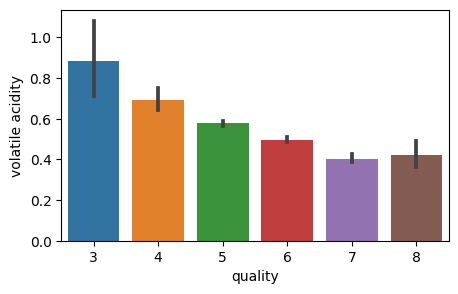

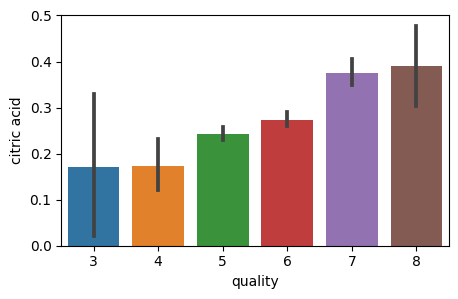

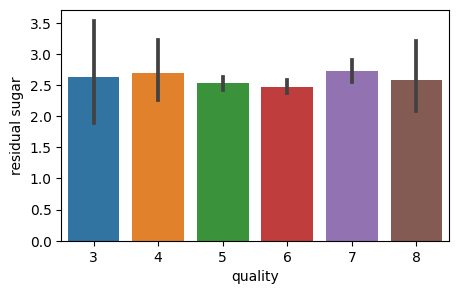

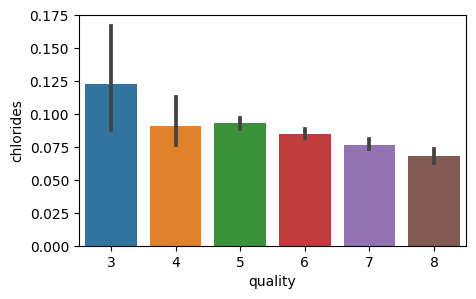

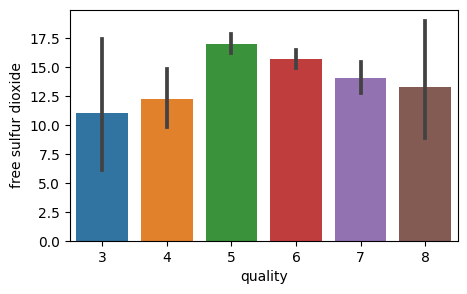

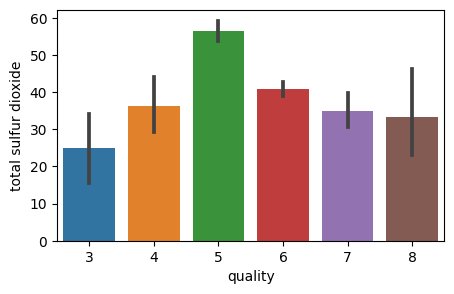

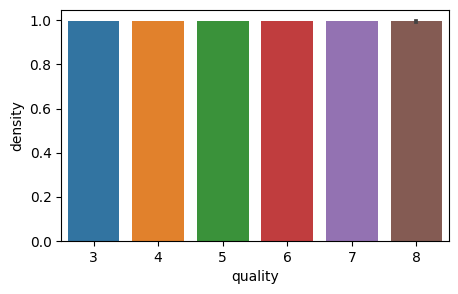

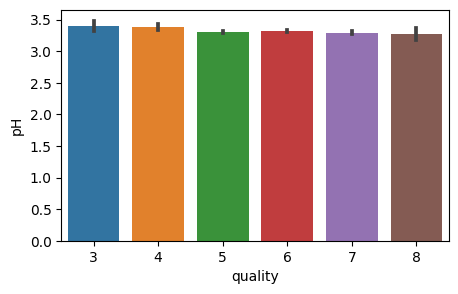

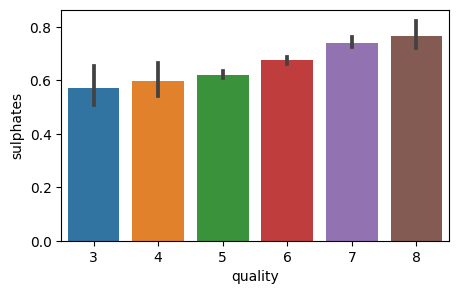

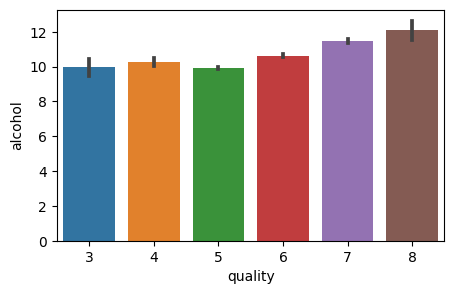

In [ ]:
a= df.iloc[:,:-1].columns

for i in a:
  plt.figure(figsize=(5,3))
  sns.barplot(x='quality',y=i ,data=df)
  print('')

<Axes: >

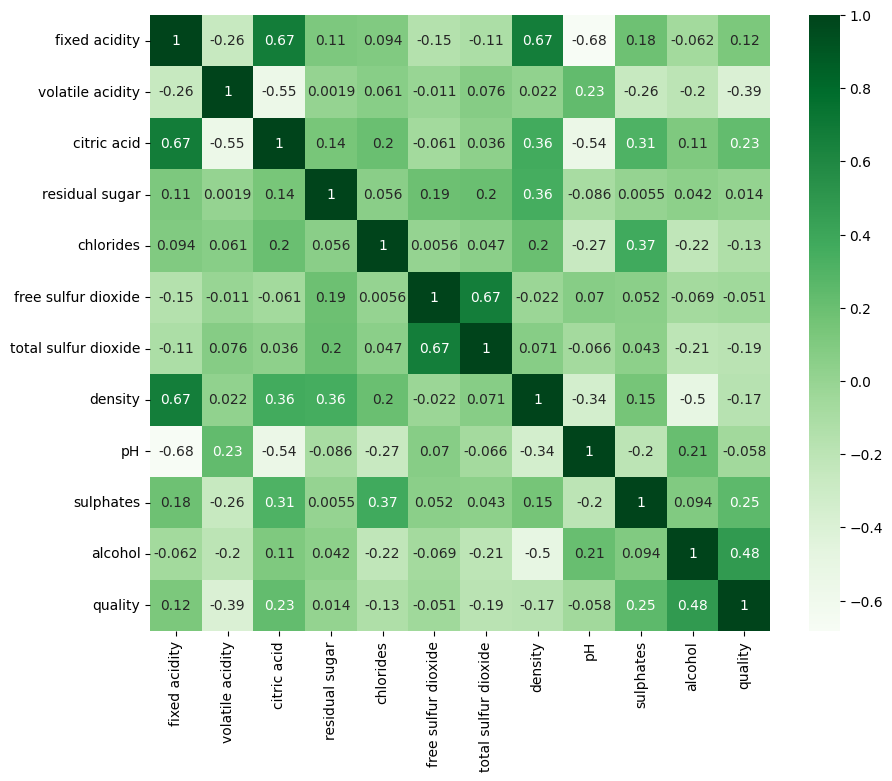

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

Data Preprocessing

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Separate the features & the target
X= df.drop(columns=['quality'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
Y= df['quality']
Y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=2)

Model training, prediction & evaluation with scaled features

In [ ]:
scaler= StandardScaler()

X_scaled= scaler.fit_transform(X_train)
X_scaled

array([[-1.39149292,  0.49474051, -1.0084547 , ...,  1.62127112,
         0.64153672,  0.64815017],
       [ 0.46437328,  2.24749629, -0.18580394, ...,  1.10301544,
        -0.70224608, -0.57780886],
       [-0.88534759,  0.49474051, -1.21411738, ...,  0.71432368,
        -0.35169405, -0.86072248],
       ...,
       [-0.82910922,  0.21203796, -1.26553306, ...,  1.42692524,
        -0.52697007,  0.17662746],
       [ 0.9705186 , -1.20147477,  0.37976846, ..., -0.4517516 ,
         0.99208876,  0.74245471],
       [-0.37920227, -1.4276368 ,  2.07648564, ..., -0.38696964,
         2.45272224, -0.48350432]])

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_scaled,Y_train)


RandomForestClassifier()

In [ ]:
X_test_scaled= scaler.transform(X_test)
Y_pred= model_rf.predict(X_test_scaled)

In [ ]:
print(accuracy_score(Y_test,Y_pred))
print(precision_score(Y_test,Y_pred,average='macro'))
print(recall_score(Y_test,Y_pred,average='macro'))

0.6625
0.33990818549642077
0.3252144607843137


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model training, prediction & evaluation without scaled features

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
Y_pred2= model_rf.predict(X_test)

In [ ]:
print('accuracy: ',accuracy_score(Y_test,Y_pred2))
print('precision: ',precision_score(Y_test,Y_pred2,average='macro'))
print('recall: ',recall_score(Y_test,Y_pred2,average='macro'))

accuracy:  0.66875
precision:  0.34373894887781153
recall:  0.32472426470588234


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Multi Label gives low accuracy so trying binary label classification.

Label Binarization

In [ ]:
Y = df['quality'].apply(lambda x: 0 if x <=5 else 1)
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

split into train & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,stratify=Y, random_state=3)

In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape )

(1599,) (1279,) (320,)


Model training

In [ ]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
Y_pred3= model_rf.predict(X_test)

In [ ]:
print('accuracy: ',accuracy_score(Y_test,Y_pred3))
print('precision: ',precision_score(Y_test,Y_pred3))
print('recall: ',recall_score(Y_test,Y_pred3))

accuracy:  0.8
precision:  0.7955801104972375
recall:  0.8421052631578947


Building Predictive System

In [ ]:
# Tool

test_sample = [5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940000000000001,3.5,0.48,9.8]
array_transf_sample = np.asarray(test_sample)
ps= model_rf.predict(array_transf_sample.reshape(1,-1))

if ps[0]==0:
  print('Bad Quality')
else:
  print('Good Quality')



Bad Quality


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print(test_sample.reshape(1,-1))
test_sample.reshape(1,-1).shape

[[ 7.8     0.58    0.02    2.      0.073   9.     18.      0.9968  3.36
   0.57    9.5   ]]


(1, 11)

In [ ]:
print(test_sample)
test_sample.shape

[ 7.8     0.58    0.02    2.      0.073   9.     18.      0.9968  3.36
  0.57    9.5   ]


(11,)